<a href="https://colab.research.google.com/github/julibecaj/BCC-kNN/blob/main/BCC_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import(
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score, roc_curve, auc
)

In [ ]:
#LOADING AND INSPECTING DATASET
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

#DATASET OVERVIEW
print("Dataset Shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())
print("\nSummary statistics:\n", df.describe())

Dataset Shape: (569, 31)

Data types:
 mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave po

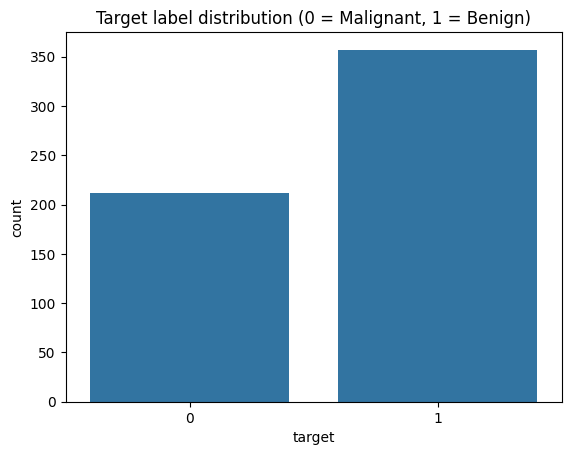

In [ ]:
#TARGET DISTRIBUTION
sns.countplot(x='target', data=df)
plt.title('Target label distribution (0 = Malignant, 1 = Benign)')
plt.show()

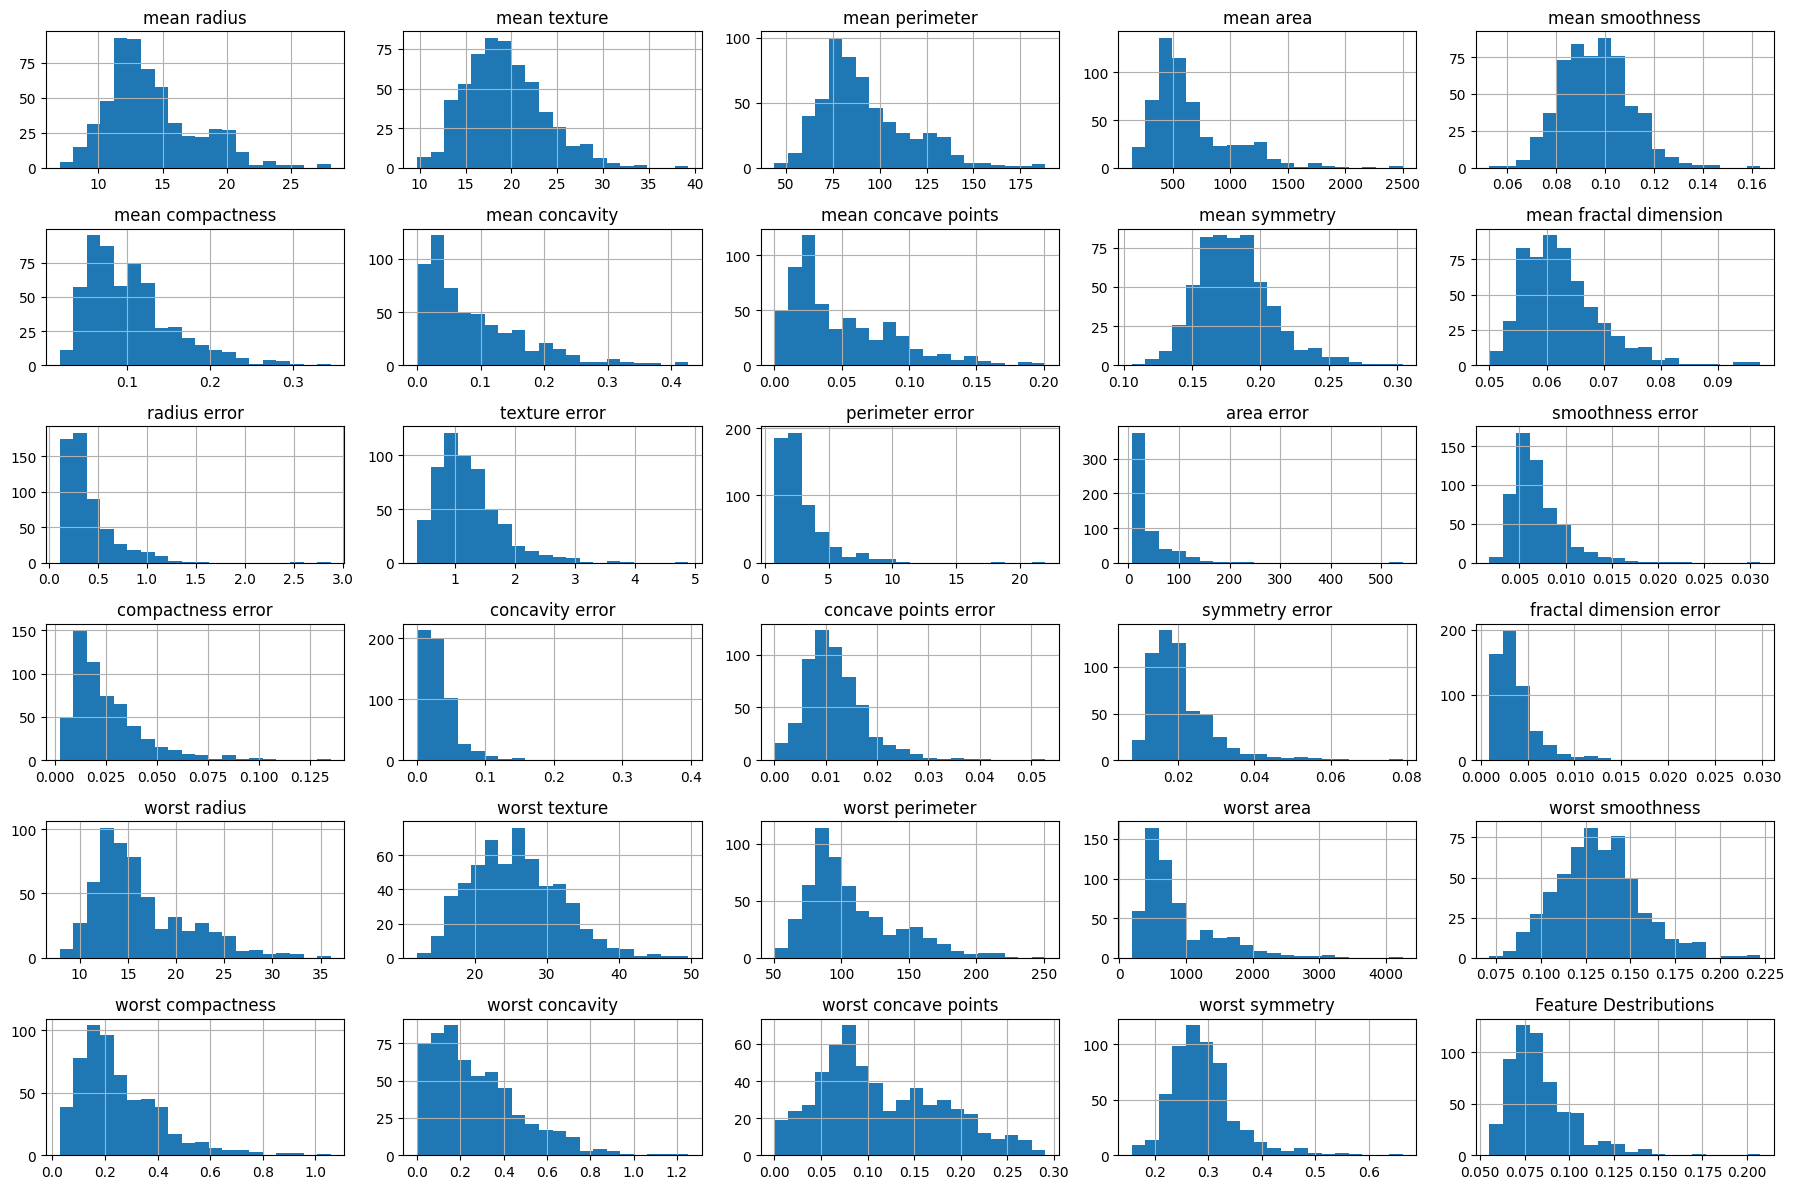

In [ ]:
#HOSTOGRAMS OF FEATURES
df.drop('target', axis=1).hist(bins=20, figsize=(18,12))
plt.title("Feature Destributions")
plt.tight_layout()
plt.show()

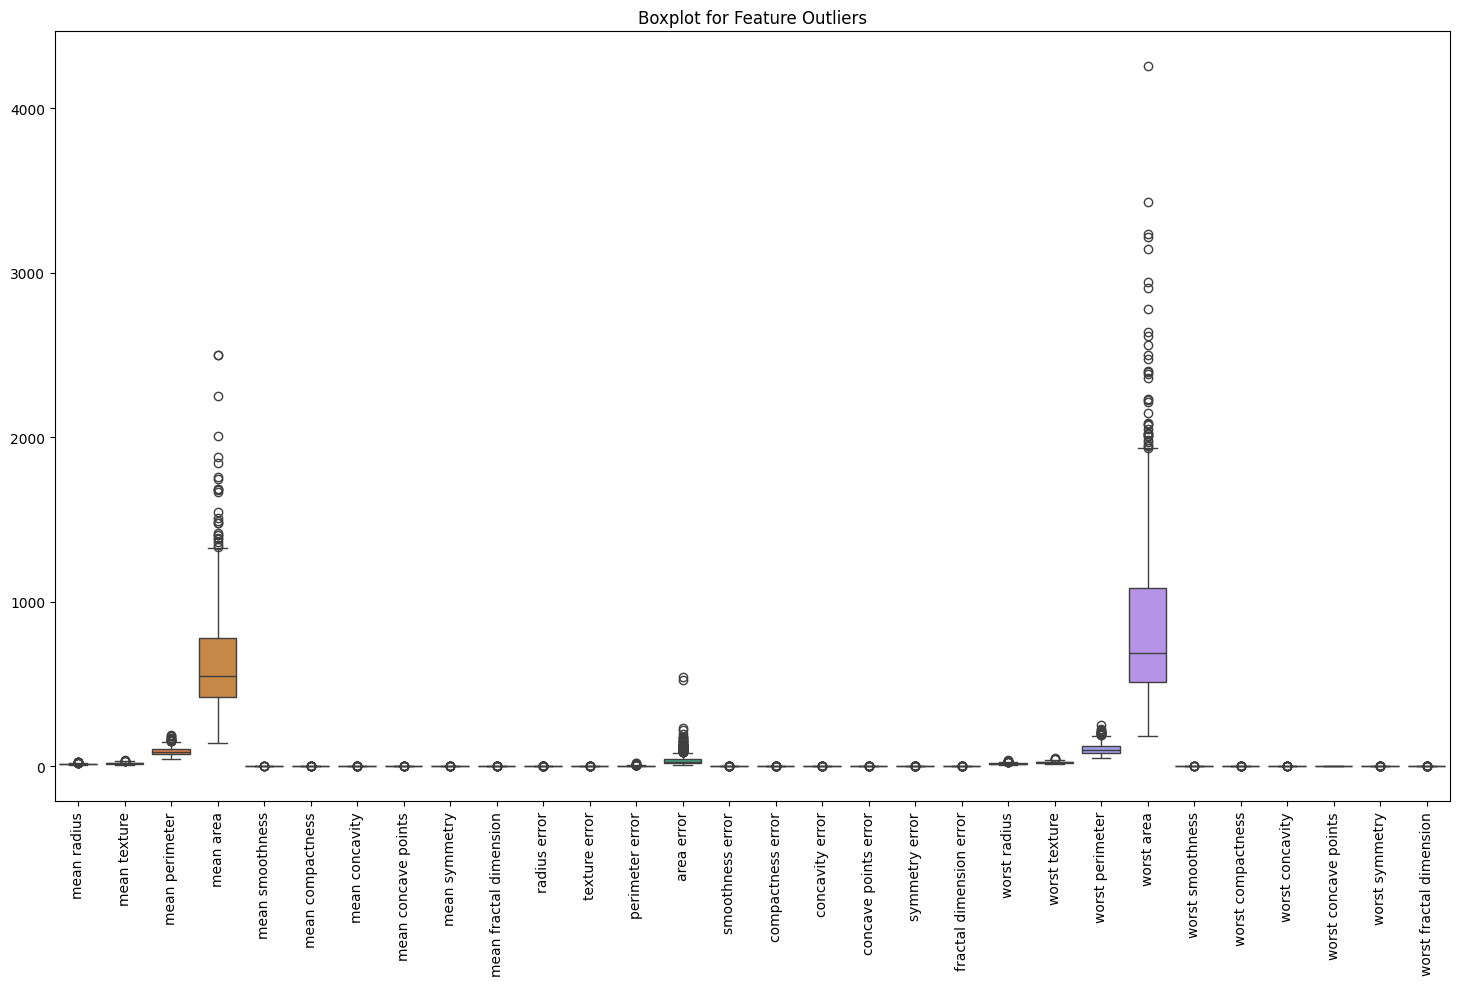

In [ ]:
#BOXPLOTS FOR OUTLIERS
plt.figure(figsize=(18,10))
sns.boxplot(data=df.drop('target', axis=1))
plt.title("Boxplot for Feature Outliers")
plt.xticks(rotation=90)
plt.show()

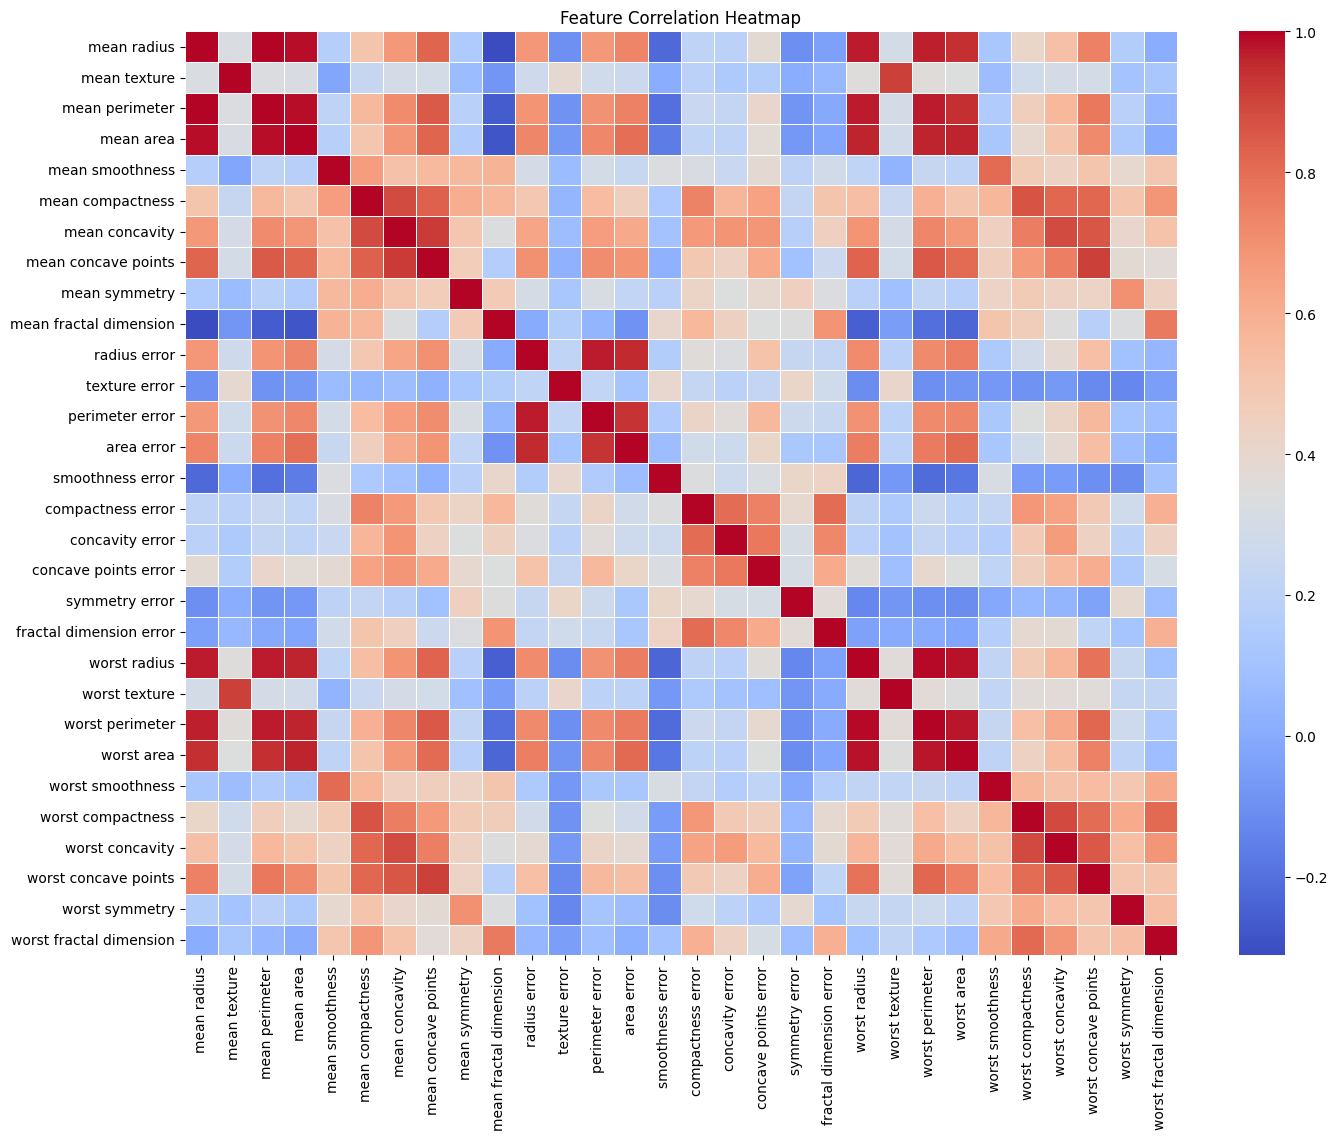

In [ ]:
#CORRELATION HEATMAP
plt.figure(figsize=(16,12))
sns.heatmap(df.drop('target', axis=1).corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#PREPROCESSING
df['target'] = df['target'].map({0: 'malignant', 1: 'benign'})

#CHECKING FOR MISSING VALUES
print("Missing values:\n", df.isnull().sum())

x = df.drop('target', axis=1)
y = df['target']

Missing values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [ ]:
#FEATURE NORMALIZATION
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
#TRAIN-TEST SPLIT
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)

print("X_TRAIN SHAPE:", x_train.shape)
print("X_TEST SHAPE:", x_test.shape)
print("Y_TRAIN SHAPE:", len(y_train))
print("Y_TRAIN SHAPE:", len(y_test))

X_TRAIN SHAPE: (455, 30)
X_TEST SHAPE: (114, 30)
Y_TRAIN SHAPE: 455
Y_TRAIN SHAPE: 114


In [ ]:
#INITIAL MODEL TRAINING
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

INITIAL ACCURACY(k=5) 0.9473684210526315

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

      benign       0.96      0.96      0.96        71
   malignant       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



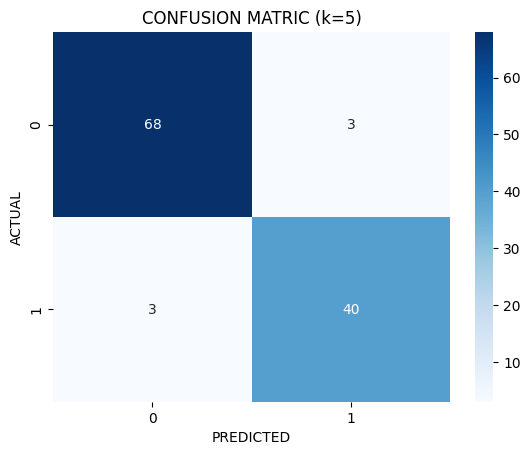

In [ ]:
#MODEL EVALUATING
print("INITIAL ACCURACY(k=5)", accuracy_score(y_test, y_pred))
print("\nCLASSIFICATION REPORT:\n", classification_report(y_test, y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.title("CONFUSION MATRIC (k=5)")
plt.show()

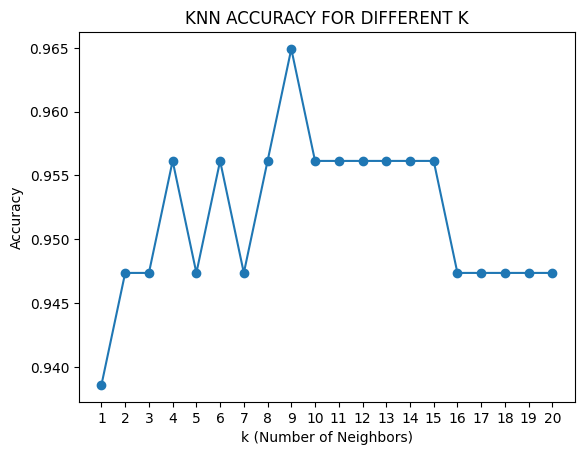

In [ ]:
#HYPERPARAMETER TUNING
accuracy_scores = []
neighbors_range = range(1, 21)

for k in neighbors_range:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train, y_train)
  preds = model.predict(x_test)
  acc = accuracy_score(y_test, preds)
  accuracy_scores.append(acc)

plt.plot(neighbors_range, accuracy_scores, marker='o')
plt.title('KNN ACCURACY FOR DIFFERENT K')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(neighbors_range)
plt.show()

In [ ]:
#RETRAIN WITH BEST K
best_k = accuracy_scores.index(max(accuracy_scores)) + 1
print("Best k: ", best_k)

knn_optimized = KNeighborsClassifier(n_neighbors=best_k)
knn_optimized.fit(x_train, y_train)
y_pred_opt = knn_optimized.predict(x_test)

optimized_accuracy = accuracy_score(y_test, y_pred_opt)
print("Optimized Accuracy (k={}):".format(best_k), optimized_accuracy)

Best k:  9
Optimized Accuracy (k=9): 0.9649122807017544


In [ ]:
# STEP 11: Compare Metrics
initial_accuracy = accuracy_score(y_test, y_pred)
initial_f1 = f1_score(y_test, y_pred, pos_label='malignant', average='binary')
optimized_f1 = f1_score(y_test, y_pred_opt, pos_label='malignant', average='binary')
initial_precision = precision_score(y_test, y_pred, pos_label='malignant', average='binary')
optimized_precision = precision_score(y_test, y_pred_opt, pos_label='malignant', average='binary')
initial_recall = recall_score(y_test, y_pred, pos_label='malignant', average='binary')
optimized_recall = recall_score(y_test, y_pred_opt, pos_label='malignant', average='binary')

comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Before Optimization': [initial_accuracy, initial_precision, initial_recall, initial_f1],
    'After Optimization': [optimized_accuracy, optimized_precision, optimized_recall, optimized_f1]
})
print("\nPerformance Comparison:\n")
print(comparison_df)



Performance Comparison:

      Metric  Before Optimization  After Optimization
0   Accuracy             0.947368            0.964912
1  Precision             0.930233            0.953488
2     Recall             0.930233            0.953488
3   F1 Score             0.930233            0.953488


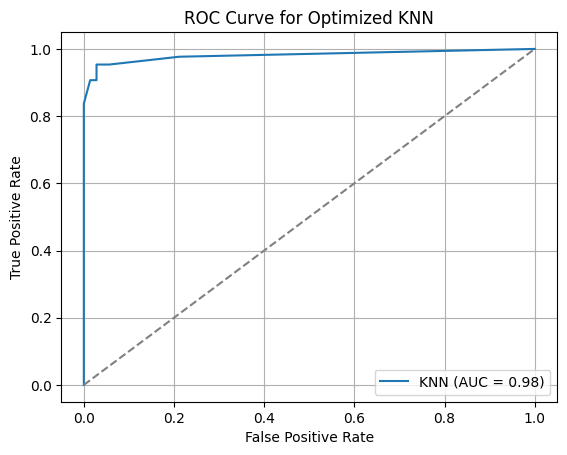

In [ ]:
# ROC Curve for Optimized KNN
y_test_bin = [1 if label == 'malignant' else 0 for label in y_test]
y_pred_proba = knn_optimized.predict_proba(x_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='KNN (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Optimized KNN')
plt.legend(loc='lower right')
plt.grid()
plt.show()
